In [41]:
#Modul myConvexHull

import math

def indeks_ekstrim(array):
    # Digunakan untuk mencari indeks dari suatu array yang memiliki nilai x minimum dan maksimum dari kumpulan titik
    indeks_x_min = 0
    indeks_x_max = 0
    for i in range(len(array)):
        if(array[i][0] < array[indeks_x_min][0]):
            indeks_x_min = i
        if(array[i][0] > array[indeks_x_max][0]):
            indeks_x_max = i

    return indeks_x_min, indeks_x_max

def determinan(p1, pn, px, array):
    # Digunakan untuk mencari determinan 
    return array[p1][0]*array[pn][1]+ array[px][0]*array[p1][1] + array[pn][0]*array[px][1] - array[px][0]*array[pn][1] - array[pn][0]*array[p1][1] - array[p1][0]*array[px][1]

def partisi(p1, pn, array):
    # Digunakan untuk mempartisi dua bagian yang berada di kiri garis p1pn (s1, det > 0) dan kanan garis p1pn (s2, det < 0)
    s1 = []; s2 = []
    for i in range(len(array)):
        if(i != p1 and i != pn and determinan(p1, pn, i, array) > 0):
            s1.append(i)
        elif(i != p1 and i != pn and determinan(p1, pn, i, array) < 0):
            s2.append(i)
    return s1, s2

def partisi_satu_sisi(p1, pn, px, array, array_partisi):
    # Digunakan untuk mempartisi bagian yang berada di luar dua bagian garis yang dihubungkan oleh tiga titik 
    p1px = [] ; pxpn = []
    for i in range(len(array_partisi)):
        if(array_partisi[i] != p1 and array_partisi[i] != pn and determinan(p1, px, array_partisi[i], array) > 0):
            p1px.append(array_partisi[i])
        if(array_partisi[i] != p1 and array_partisi[i] != pn and determinan(px, pn, array_partisi[i], array) > 0):
            pxpn.append(array_partisi[i])
    return p1px, pxpn

def jarak(p1, pn, px, array):
    # Digunakan untuk mencari jarak dari titik px ke garis p1pn
    return abs(((array[pn][0]-array[p1][0])*(array[p1][1]-array[px][1]) - (array[p1][0]-array[px][0])*(array[pn][1]-array[p1][1])) / math.sqrt((array[pn][0]-array[p1][0])**2 + (array[pn][1]-array[p1][1])**2))

def sudut_p1(px,p1,pn, array):
    # Digunakan untuk mencari sudut p1
    sudut = math.degrees(math.atan2(array[pn][1]-array[p1][1], array[pn][0]-array[p1][0]) - math.atan2(array[px][1]-array[p1][1], array[px][0]-array[p1][0]))

    if(sudut < 0):
        return 360 + sudut
    else:
        return sudut

def titik_terjauh(p1, pn, array, array_partisi):
    # Digunakan untuk mencari titik terjauh dari garis p1pn (px)
    temp = 0
    for i in range(len(array_partisi)):
        if(jarak(p1, pn, array_partisi[temp], array) < jarak(p1, pn, array_partisi[i], array)):
            temp = i
        elif(jarak(p1, pn, array_partisi[temp], array) == jarak(p1, pn, array_partisi[i], array)):
            if(sudut_p1(array_partisi[temp], p1, pn, array) <= sudut_p1(array_partisi[i], p1, pn, array)):
                temp = i
    return array_partisi[temp]

def divide_and_conquer(p1, pn, array, array_partisi, ConvexHull):
    # Digunakan untuk mendapatkan titik pembentuk convex hull dari kumpulan titik
    # Jika array yang ingin dipartisi kosong, berarti tidak ada titik yang berada di kanan atau kiri garis
    if(len(array_partisi)) == 0:
        ConvexHull.append([p1, pn])
    else:
        # Mencari titik terjauh dari garis p1pn (px)
        px = titik_terjauh(p1, pn, array, array_partisi)
        
        # Mengecek titik yang berada di bagian luar garis p1px dan pxpn
        p1px, pxpn = partisi_satu_sisi(p1, pn, px, array, array_partisi)

        # Lakukan partisi kembali hingga tidak ada titik yang berada di luar convex hull
        divide_and_conquer(p1, px, array, p1px, ConvexHull)
        divide_and_conquer(px, pn, array, pxpn, ConvexHull)

# Implementasi dari myConvexHull

def myConvexHull(array):
    ConvexHull = []
    # Mencari indeks dari titik yang memiliki nilai x minimum dan maksimum
    p1, pn = indeks_ekstrim(array)

    # Membuat kumpulan titik dari sebelah kiri garis p1pn (s1) dan sebelah kanan garis p1pn (s2)
    s1, s2 = partisi(p1, pn, array)

    # Mempartisi kembali setiap titik yang berada di s1 dan s2 sehingga didapatkan kumpulan titik pembentuk convex hull
    divide_and_conquer(p1, pn, array, s1, ConvexHull)
    divide_and_conquer(pn, p1, array, s2, ConvexHull)

    return ConvexHull

In [42]:
#Dataset iris
import pandas as pd

from sklearn import datasets 
data = datasets.load_iris() 

#Create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


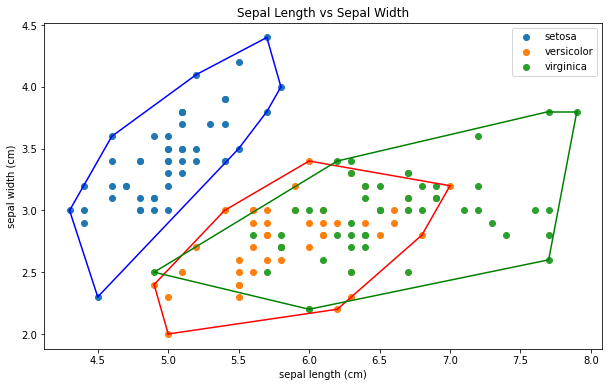

In [43]:
#Visualisasi hasil ConvexHull
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Sepal Length vs Sepal Width')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket) 
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

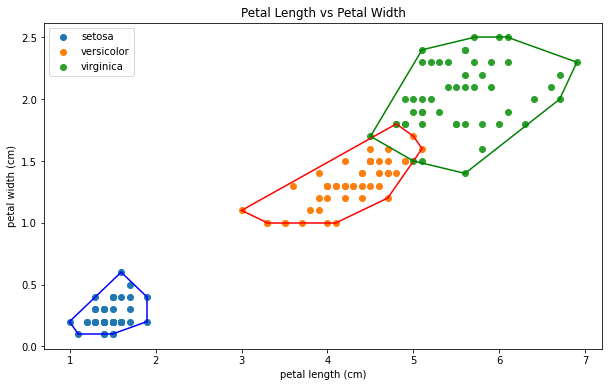

In [44]:
#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Length vs Petal Width')
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = myConvexHull(bucket) 
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

In [45]:
#Dataset wine
import pandas as pd

from sklearn import datasets 
data = datasets.load_wine() 

#Create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 
print(df.shape)
df.head()

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


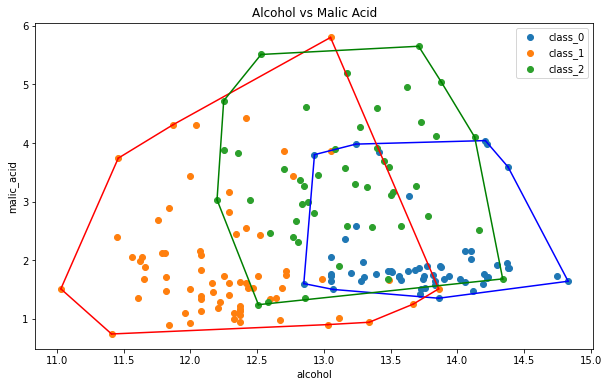

In [46]:
#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Alcohol vs Malic Acid')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket) 
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

In [47]:
#Dataset breast cancer
import pandas as pd

from sklearn import datasets 
data = datasets.load_breast_cancer() 

#Create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 
print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


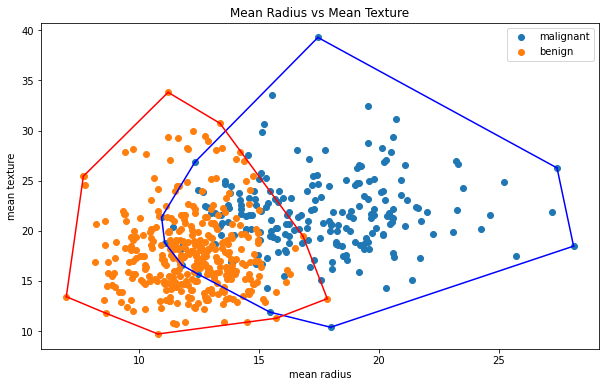

In [48]:
#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Mean Radius vs Mean Texture')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket) 
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()